In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, classification_report)
 

# Loading the Data and Selecting the Features

In [2]:
x_train = pd.read_csv('loan_data_inputs_train.csv')
y_train = pd.read_csv('loan_data_targets_train.csv')
x_test = pd.read_csv('loan_data_inputs_test.csv')
y_test = pd.read_csv('loan_data_targets_test.csv')

In [3]:
print("Train data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)

Train data: (40423, 77) (40423, 1)
Test data: (13475, 77) (13475, 1)


In [4]:
y_train = y_train.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)

In [5]:
print("Train data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)

Train data: (40423, 77) (40423,)
Test data: (13475, 77) (13475,)


In [6]:
x_train.head()

,IncomeRange,IncomeVerifiable,IsBorrowerHomeowner,DebtToIncomeRatio,AvailableBankcardCredit,EmploymentStatus,LoanStatus,Term,LoanOriginalAmount,ProsperRating (Alpha),...,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCreditFactor,AvailableBankcardCredit:<8.5k,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k
0,"$25,000-49,999",True,False,0.07,1645.0,Employed,Chargedoff,60,3500,E,...,0,0,0,"(-498.374, 9967.48]",1,0,0,0,0,0
1,"$100,000+",True,True,0.23,10704.0,Employed,Current,60,15000,A,...,0,0,0,"(9967.48, 19934.96]",0,1,0,0,0,0
2,"$100,000+",True,False,0.18,24063.0,Employed,Current,60,25000,A,...,0,0,0,"(19934.96, 29902.44]",0,0,0,1,0,0
3,"$50,000-74,999",True,False,0.20,47304.0,Employed,Current,36,4000,D,...,0,0,0,"(39869.92, 49837.4]",0,0,0,0,0,1
4,"$50,000-74,999",True,False,0.12,2630.0,Employed,Current,60,15000,C,...,0,0,0,"(-498.374, 9967.48]",1,0,0,0,0,0


In [7]:
x_test.head()

,IncomeRange,IncomeVerifiable,IsBorrowerHomeowner,DebtToIncomeRatio,AvailableBankcardCredit,EmploymentStatus,LoanStatus,Term,LoanOriginalAmount,ProsperRating (Alpha),...,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCreditFactor,AvailableBankcardCredit:<8.5k,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k
0,"$25,000-49,999",True,False,0.35,0.0,Employed,Current,36,2500,HR,...,0,1,0,"(-360.0, 7200.0]",1,0,0,0,0,0
1,"$1-24,999",False,False,NaN,115.0,Self-employed,Current,60,12000,D,...,0,0,0,"(-360.0, 7200.0]",1,0,0,0,0,0
2,"$50,000-74,999",True,True,0.42,12145.0,Employed,Current,36,15000,C,...,0,0,1,"(7200.0, 14400.0]",0,1,0,0,0,0
3,"$75,000-99,999",True,False,0.13,200.0,Employed,Current,36,4000,B,...,0,0,0,"(-360.0, 7200.0]",1,0,0,0,0,0
4,"$75,000-99,999",True,False,0.18,378.0,Employed,Completed,36,4000,D,...,0,0,0,"(-360.0, 7200.0]",1,0,0,0,0,0


### Selecting the Features

In [8]:
x_train.columns.values

array(['IncomeRange', 'IncomeVerifiable', 'IsBorrowerHomeowner',
       'DebtToIncomeRatio', 'AvailableBankcardCredit', 'EmploymentStatus',
       'LoanStatus', 'Term', 'LoanOriginalAmount',
       'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerRate',
       'CreditScoreRange', 'IncomeRange:$0', 'IncomeRange:$1-24,999',
       'IncomeRange:$100,000+', 'IncomeRange:$25,000-49,999',
       'IncomeRange:$50,000-74,999', 'IncomeRange:$75,000-99,999',
       'IncomeRange:Not employed', 'EmploymentStatus:Employed',
       'EmploymentStatus:Full-time', 'EmploymentStatus:Not employed',
       'EmploymentStatus:Other', 'EmploymentStatus:Part-time',
       'EmploymentStatus:Retired', 'EmploymentStatus:Self-employed',
       'CreditScoreRange:Exceptional (800+)',
       'CreditScoreRange:Fair (600-679)',
       'CreditScoreRange:Good (680-739)',
       'CreditScoreRange:Very Good (740-799)', 'IncomeVerifiable:False',
       'IncomeVerifiable:True', 'IsBorrowerHomeowner:False',
       'IsBorrow

In [9]:
x_train_with_ref_cat = x_train[['IncomeRange:$0', 'IncomeRange:$1-24,999',
       'IncomeRange:$100,000+', 'IncomeRange:$25,000-49,999',
       'IncomeRange:$50,000-74,999', 'IncomeRange:$75,000-99,999',
       'IncomeRange:Not employed', 'EmploymentStatus:Employed',
       'CreditScoreRange:Exceptional (800+)',
       'CreditScoreRange:Fair (600-679)',
       'CreditScoreRange:Good (680-739)',
       'CreditScoreRange:Very Good (740-799)', 'IncomeVerifiable:False',
       'IncomeVerifiable:True', 'IsBorrowerHomeowner:False',
       'IsBorrowerHomeowner:True', 'ProsperRating (Alpha):A',
       'ProsperRating (Alpha):AA', 'ProsperRating (Alpha):B',
       'ProsperRating (Alpha):C', 'ProsperRating (Alpha):D',
       'ProsperRating (Alpha):E', 'ProsperRating (Alpha):HR',
       'EmploymentStatus:Other__self_employed__full_time',
       'EmploymentStatus:Not_employed__part_time__retired', 'Term:12',
       'Term:36', 'Term:60', 'ProsperScore:1', 'ProsperScore:2-5',
       'ProsperScore:6-8', 'ProsperScore:9-11',
       'BorrowerRate:<0.111', 'BorrowerRate:0.111, 0.188',
       'BorrowerRate:0.188, 0.243', 'BorrowerRate:0.243-0.292',
       'BorrowerRate:>0.292',
       'LoanOriginalAmount:<7.5K', 'LoanOriginalAmount:7.5K-15K',
       'LoanOriginalAmount:15K-20.4K', 'LoanOriginalAmount:20.4K-24.3k',
       'LoanOriginalAmount>24.3k',
       'DebtToIncomeRatio:Missing', 'DebtToIncomeRatio:<0.088',
       'DebtToIncomeRatio:0.088-0.244', 'DebtToIncomeRatio:0.244-0.296',
       'DebtToIncomeRatio:0.296-0.4', 'DebtToIncomeRatio>0.4',
        'AvailableBankcardCredit:<8.5k',
       'AvailableBankcardCredit:8.5k-15.5k',
       'AvailableBankcardCredit:15.5k-21k',
       'AvailableBankcardCredit:21k-25.5k',
       'AvailableBankcardCredit:25.5k-30k', 'AvailableBankcardCredit>30k']]




ref_categories = ['IncomeRange:$0', 'EmploymentStatus:Not_employed__part_time__retired','CreditScoreRange:Fair (600-679)',
                 'Term:60','IsBorrowerHomeowner:False','IncomeVerifiable:False',
                  'BorrowerRate:<0.111','ProsperRating (Alpha):HR','LoanOriginalAmount:<7.5K',
                  'DebtToIncomeRatio:<0.088', 'AvailableBankcardCredit:<8.5k','ProsperScore:1',
                 'EmploymentStatus:Not_employed__part_time__retired']

In [10]:
inputs_train = x_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,"IncomeRange:$1-24,999","IncomeRange:$100,000+","IncomeRange:$25,000-49,999","IncomeRange:$50,000-74,999","IncomeRange:$75,000-99,999",IncomeRange:Not employed,EmploymentStatus:Employed,CreditScoreRange:Exceptional (800+),CreditScoreRange:Good (680-739),CreditScoreRange:Very Good (740-799),...,DebtToIncomeRatio:Missing,DebtToIncomeRatio:0.088-0.244,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
inputs_train.dtypes

IncomeRange:$1-24,999                               int64
IncomeRange:$100,000+                               int64
IncomeRange:$25,000-49,999                          int64
IncomeRange:$50,000-74,999                          int64
IncomeRange:$75,000-99,999                          int64
IncomeRange:Not employed                            int64
EmploymentStatus:Employed                           int64
CreditScoreRange:Exceptional (800+)                 int64
CreditScoreRange:Good (680-739)                     int64
CreditScoreRange:Very Good (740-799)                int64
IncomeVerifiable:True                               int64
IsBorrowerHomeowner:True                            int64
ProsperRating (Alpha):A                             int64
ProsperRating (Alpha):AA                            int64
ProsperRating (Alpha):B                             int64
ProsperRating (Alpha):C                             int64
ProsperRating (Alpha):D                             int64
ProsperRating 

# PD Model Estimation

## Logistic Regression

In [12]:
pd.options.display.max_rows = None

In [13]:
reg = LogisticRegression(max_iter=1000)

In [14]:
reg.fit(inputs_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
reg.intercept_

array([3.73856293])

In [16]:
reg.coef_

array([[-0.28137575,  0.62410333, -0.12600608,  0.23724793,  0.39538749,
        -0.05448987,  0.2548273 , -0.28312374, -0.05172125, -0.12580833,
        -0.4020771 , -0.01889747, -0.61510529, -0.12418433, -0.85494987,
        -0.52364589, -0.3855522 ,  0.40547315,  0.20630094, -0.29800285,
         0.12799154,  0.93148418,  0.51015126,  0.62441608, -0.37108272,
        -1.52114322, -2.4935476 , -3.5461717 , -0.10528762,  0.23134716,
        -0.14078701, -0.01424581, -0.42159445,  0.36625547,  0.45606472,
         0.52717141,  0.46164755, -0.23864509, -0.19829785, -0.30375529,
        -0.56554715, -0.28765929]])

In [17]:
feature_name = inputs_train.columns.values

In [18]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,3.738563
1,"IncomeRange:$1-24,999",-0.281376
2,"IncomeRange:$100,000+",0.624103
3,"IncomeRange:$25,000-49,999",-0.126006
4,"IncomeRange:$50,000-74,999",0.237248
5,"IncomeRange:$75,000-99,999",0.395387
6,IncomeRange:Not employed,-0.054490
7,EmploymentStatus:Employed,0.254827
8,CreditScoreRange:Exceptional (800+),-0.283124
9,CreditScoreRange:Good (680-739),-0.051721


## Build a Logistic Regression Model with P-Values

Which independent variables contributes to predicting borrower default and which dont? The accepted approach is to check the statistical signficane of coeeficients of each dummy variables. We look at P-value. Alter the fit model

In [19]:
import statsmodels.api as sm

In [20]:
inputs_train['intercept']= 1
logit_mod =sm.Logit(y_train,inputs_train)

#fit the model
results = logit_mod.fit()

#get summary statistics
results.summary2() 

Optimization terminated successfully.
         Current function value: 0.222125
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.129     
Dependent Variable:             y                          AIC:                        18043.9306
Date:                           2022-03-04 12:03           BIC:                        18414.0382
No. Observations:               40423                      Log-Likelihood:             -8979.0   
Df Model:                       42                         LL-Null:                    -10308.   
Df Residuals:                   40380                      LLR p-value:                0.0000    
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 8.0000                                                           
-------------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
IncomeRange:$1-24,999                             0.0694   0.7172   0.0968 0.9229 -1.3363  1.4751
IncomeRange:$100,000+                             0.9817   0.7177   1.3678 0.1714 -0.4250  2.3884
IncomeRange:$25,000-49,999                        0.2258   0.7153   0.3157 0.7522 -1.1762  1.6278
IncomeRange:$50,000-74,999                        0.5893   0.7159   0.8231 0.4105 -0.8139  1.9924
IncomeRange:$75,000-99,999                        0.7496   0.7172   1.0453 0.2959 -0.6560  2.1553
IncomeRange:Not employed                          0.3682   0.8274   0.4450 0.6563 -1.2535  1.9899
EmploymentStatus:Employed                         0.3258   0.3977   0.8194 0.4126 -0.4536  1.1053
CreditScoreRange:Exceptional (800+)              -0.2824   0.1528  -1.8483 0.0646 -0.5819  0.0171
CreditScoreRange:Good (680-739)                  -0.0513   0.0490  -1.0477 0.2948 -0.1474  0.0447
CreditScoreRange:Very Good (740-799)             -0.1182   0.0717  -1.6493 0.0991 -0.2587  0.0223
IncomeVerifiable:True                            -0.8771   0.8653  -1.0137 0.3107 -2.5730  0.8188
IsBorrowerHomeowner:True                         -0.0200   0.0444  -0.4498 0.6528 -0.1071  0.0671
ProsperRating (Alpha):A                          -0.9435   0.2214  -4.2615 0.0000 -1.3775 -0.5096
ProsperRating (Alpha):AA                         -0.5878   0.3316  -1.7725 0.0763 -1.2377  0.0622
ProsperRating (Alpha):B                          -1.0957   0.1938  -5.6550 0.0000 -1.4755 -0.7160
ProsperRating (Alpha):C                          -0.6795   0.1544  -4.4008 0.0000 -0.9821 -0.3769
ProsperRating (Alpha):D                          -0.4934   0.1318  -3.7442 0.0002 -0.7516 -0.2351
ProsperRating (Alpha):E                           0.3670   0.0826   4.4439 0.0000  0.2052  0.5289
EmploymentStatus:Other__self_employed__full_time  0.2765   0.4003   0.6908 0.4897 -0.5080  1.0610
Term:12                                          -0.4166   0.1950  -2.1369 0.0326 -0.7988 -0.0345
Term:36                                           0.0978   0.0524   1.8680 0.0618 -0.0048  0.2005
ProsperScore:2-5                                  0.9527   0.1344   7.0862 0.0000  0.6892  1.2162
ProsperScore:6-8                                  0.5540   0.1404   3.9444 0.0001  0.2787  0.8292
ProsperScore:9-11                                 0.6573   0.1841   3.5709 0.0004  0.2965  1.0181
BorrowerRate:0.111, 0.188                        -0.6099   0.1688  -3.6119 0.0003 -0.9408 -0.2789
BorrowerRate:0.188, 0.243                        -1.8586   0.2001  -9.2865 0.0000 -2.2509 -1.4663
BorrowerRate:0.243-0.292                         -2.8858   0.2158 -13.3753 0.0000 -3.3087 -2.4630
BorrowerRate:>0.292                              -4.0072   0.2439 -16.432

In [21]:
pvalue = pd.DataFrame(results.pvalues,columns={'p_value'},)
pvalue

,p_value
"IncomeRange:$1-24,999",9.228970e-01
"IncomeRange:$100,000+",1.713741e-01
"IncomeRange:$25,000-49,999",7.522320e-01
"IncomeRange:$50,000-74,999",4.104509e-01
"IncomeRange:$75,000-99,999",2.958955e-01
IncomeRange:Not employed,6.563073e-01
EmploymentStatus:Employed,4.125764e-01
CreditScoreRange:Exceptional (800+),6.455433e-02
CreditScoreRange:Good (680-739),2.947553e-01
CreditScoreRange:Very Good (740-799),9.909538e-02


In [22]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue['p_value'][i] < 0.05:
        pvs.append(pvalue.index[i])
    if 'const' in pvs:
         pvs.remove('const')
    else:
         pvs 
print(pvs)
print(len(pvs))

['ProsperRating (Alpha):A', 'ProsperRating (Alpha):B', 'ProsperRating (Alpha):C', 'ProsperRating (Alpha):D', 'ProsperRating (Alpha):E', 'Term:12', 'ProsperScore:2-5', 'ProsperScore:6-8', 'ProsperScore:9-11', 'BorrowerRate:0.111, 0.188', 'BorrowerRate:0.188, 0.243', 'BorrowerRate:0.243-0.292', 'BorrowerRate:>0.292', 'DebtToIncomeRatio:0.088-0.244', 'DebtToIncomeRatio:0.244-0.296', 'DebtToIncomeRatio:0.296-0.4', 'DebtToIncomeRatio>0.4', 'AvailableBankcardCredit:8.5k-15.5k', 'AvailableBankcardCredit:15.5k-21k', 'AvailableBankcardCredit:21k-25.5k', 'AvailableBankcardCredit:25.5k-30k', 'AvailableBankcardCredit>30k', 'intercept']
23


### Fitting the Logistic Regression Again

In [23]:
imput_train2 = inputs_train[pvs]

In [24]:
reg2 = LogisticRegression()

In [25]:
reg2.fit(imput_train2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
reg2.intercept_

array([3.85613908])

In [27]:
reg2.coef_

array([[-7.15974983e-01, -9.77716398e-01, -6.42021708e-01,
        -4.63262661e-01,  4.06650915e-01, -3.47375520e-01,
         8.04133961e-01,  3.69892671e-01,  5.44675412e-01,
        -2.93756041e-01, -1.48669750e+00, -2.54494931e+00,
        -3.59028516e+00,  4.96138765e-01,  5.17124089e-01,
         5.07855388e-01,  3.15931995e-01, -2.16332101e-01,
        -1.66559360e-01, -2.85053311e-01, -5.35630548e-01,
        -2.55943806e-01, -1.91997998e-03]])

In [28]:
feature_name2 = imput_train2.columns.values

In [29]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name2)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,3.856139
1,ProsperRating (Alpha):A,-0.715975
2,ProsperRating (Alpha):B,-0.977716
3,ProsperRating (Alpha):C,-0.642022
4,ProsperRating (Alpha):D,-0.463263
5,ProsperRating (Alpha):E,0.406651
6,Term:12,-0.347376
7,ProsperScore:2-5,0.804134
8,ProsperScore:6-8,0.369893
9,ProsperScore:9-11,0.544675


In [30]:
imput_train2['intercept']= 1
logit_mod =sm.Logit(y_train,imput_train2)

#fit the model
results = logit_mod.fit()

#get summary statistics
results.summary2() 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: 0.224679
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.119     
Dependent Variable:       y                      AIC:                    18210.4289
Date:                     2022-03-04 12:03       BIC:                    18408.3934
No. Observations:         40423                  Log-Likelihood:         -9082.2   
Df Model:                 22                     LL-Null:                -10308.   
Df Residuals:             40400                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           8.0000                                                   
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
ProsperRating (Alpha):A            -0.8500   0.1614  -5.2667 0.0000 -1.1663 -0.5337
ProsperRating (Alpha):B            -1.0682   0.1519  -7.0308 0.0000 -1.3660 -0.7705
ProsperRating (Alpha):C            -0.6914   0.1261  -5.4850 0.0000 -0.9385 -0.4444
ProsperRating (Alpha):D            -0.4936   0.1136  -4.3457 0.0000 -0.7162 -0.2710
ProsperRating (Alpha):E             0.4027   0.0758   5.3157 0.0000  0.2542  0.5512
Term:12                            -0.4053   0.1856  -2.1833 0.0290 -0.7691 -0.0415
ProsperScore:2-5                    0.8265   0.1309   6.3142 0.0000  0.5699  1.0830
ProsperScore:6-8                    0.3979   0.1357   2.9330 0.0034  0.1320  0.6637
ProsperScore:9-11                   0.5335   0.1751   3.0475 0.0023  0.1904  0.8766
BorrowerRate:0.111, 0.188          -0.4232   0.1465  -2.8893 0.0039 -0.7102 -0.1361
BorrowerRate:0.188, 0.243          -1.6698   0.1649 -10.1234 0.0000 -1.9931 -1.3465
BorrowerRate:0.243-0.292           -2.7499   0.1680 -16.3733 0.0000 -3.0791 -2.4207
BorrowerRate:>0.292                -3.8201   0.1752 -21.8015 0.0000 -4.1636 -3.4767
DebtToIncomeRatio:0.088-0.244       0.4961   0.0557   8.9133 0.0000  0.3870  0.6052
DebtToIncomeRatio:0.244-0.296       0.5191   0.0768   6.7602 0.0000  0.3686  0.6696
DebtToIncomeRatio:0.296-0.4         0.5110   0.0671   7.6123 0.0000  0.3794  0.6425
DebtToIncomeRatio>0.4               0.3208   0.0686   4.6798 0.0000  0.1865  0.4552
AvailableBankcardCredit:8.5k-15.5k -0.2201   0.0636  -3.4580 0.0005 -0.3448 -0.0953
AvailableBankcardCredit:15.5k-21k  -0.1708   0.0937  -1.8229 0.0683 -0.3545  0.0128
AvailableBankcardCredit:21k-25.5k  -0.2933   0.1188  -2.4693 0.0135 -0.5262 -0.0605
AvailableBankcardCredit:25.5k-30k  -0.5533   0.1279  -4.3277 0.0000 -0.8039 -0.3027
AvailableBankcardCredit>30k        -0.2725   0.0866  -3.1464 0.0017 -0.4422 -0.1028
intercept                           4.0596   0.2265  17.9236 0.0000  3.6157  4.5035
===================================================================================

"""

In [31]:
pvalue = pd.DataFrame(results.pvalues,columns={'p_value'},)
pvalue

,p_value
ProsperRating (Alpha):A,1.388803e-07
ProsperRating (Alpha):B,2.052925e-12
ProsperRating (Alpha):C,4.133659e-08
ProsperRating (Alpha):D,1.388356e-05
ProsperRating (Alpha):E,1.062505e-07
Term:12,2.901139e-02
ProsperScore:2-5,2.715057e-10
ProsperScore:6-8,3.357346e-03
ProsperScore:9-11,2.307550e-03
"BorrowerRate:0.111, 0.188",3.860662e-03


Now, let's see how we can interpret the coefficients of this model, earlier in this section, we looked
at what the coefficient of a dummy variable in a logistic regression model means.
We saw that the exponential of a coefficient of a dummy variable shows the change in the odds for an
event occurring between an observation with a zero value for that dummy variable and an observation
with a value of one.
According to our definition of the good bad variable, the event occurring is non default, that is,
being a good borrower.
So higher coefficients of dummy variables in our model mean greater odds of being a good borrower and
correspondingly lower odds for default.
Let me explain what serves as a comparison.
Well, we compare them to the reference categories we left out of the model precisely for that purpose
to serve as a reference point.
How so?
Well, if an observation belongs to the reference category, it will have values of zero for all other
dummy variables that represent an original independent variable.
So the odds of being good for that observation compared to an observation that belong to another category,
will be an exponent to the power zero.
While if an observation belongs to another category, its odds will be an exponent to the power, the
coefficient of the respective dummy variable greater than the odds of the first observation.
To clarify, we can use an example from the model.
Let's take the first original independent variable, the great variable, as you know, there were seven
initial categories of external grade represented by the letters from A to G.
So in terms of weight of evidence, with respect to the good bad variable, A is the best one.
G is the worst.
That's why we decided to make G the reference category.
In fact, we got all positive coefficients for the dummy variables we included in the model from A to
F. That means observations with these values are all better than observations with a rating of G.
Furthermore, we can see here that going from F to A, the coefficients are increasing in magnitude.
In other words, the odds of being good are increasing as the external rating is increasing.
And that's just how it's supposed to be.
But what exactly are the odds for someone with an external rating of, let's say, D to be better than
someone with an external rating?
G The ratio of the odds for someone with an external rating?
D To be good aren't exponent raised to the power, the coefficient of the dummy variable that is an
exponent raised to zero point five zero one two.
That's approximately one point sixty five.
So the odds for someone with a rating of D to be a good borrower are about one point sixty five times
greater than the odds for someone with a rating of G.
Similarly, the odds of someone with A rating of B to be a good borrower are about 2.5 or two times
greater than the odds for someone with a rating of G.
As you may have noticed, we pretend that the reference category has a regression coefficient of zero
here, the reference category serves to compare the odds of the rest for the dummy variables to it.
Thus it can also help to compare them with each other.
We know that the odds of someone with be to be good are two point four, two times the odds of someone
with G to be good.
We are also aware that the odds of someone with D to be good are one point sixty five times the odds
of someone with G to be good.
Therefore, the odds of someone with B to be good are two point four to divide, divided by one point
sixty five times greater than the odds of someone with D to be good or about one point four six seven
one.
At the same time, we don't really need another point of comparison for the two categories, we know
that the odds of someone with D to be good compared to someone with a rating of gee are an exponent
of the coefficient of the D dummy variable.
Furthermore, the odds of someone with B to be good compared to someone with the rating of G are an
exponent of the coefficient of the B dummy variable.
So we can easily deduce that the odds for someone with B to be good compared to someone with these are
an exponent of the difference of the coefficients of the two dummy variables.
That is an exponent raise to power zero point eight eight four or five minus zero point five.
That yields about one point four six seven one.
Exactly what we got before.
Well, that's how we can interpret the coefficients for every set of dummy variables representing an
original independent variable, note that such direct comparisons are possible only between categories
coming from one and the same original independent variable.
For example, it won't be accurate to compare the odds of someone with external rating B to be a good
borrower to the odds of someone with deployment length between five and six years directly based on
the coefficients we got.
That's due to the fact that some people with external rating B actually have employment length between
five and six years.
In other words, the two groups won't be mutually exclusive, while as we have ensured by definition
all dummy variables coming from the same original independent variable are mutually exclusive.
Each observation belongs only to one of them and does not belong to the rest.
Thanks for watching and see y

In [32]:
import pickle

In [33]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [34]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.


x_test_with_ref_cat = x_test[['IncomeRange:$0', 'IncomeRange:$1-24,999',
       'IncomeRange:$100,000+', 'IncomeRange:$25,000-49,999',
       'IncomeRange:$50,000-74,999', 'IncomeRange:$75,000-99,999',
       'IncomeRange:Not employed', 'EmploymentStatus:Employed',
       'CreditScoreRange:Exceptional (800+)',
       'CreditScoreRange:Fair (600-679)',
       'CreditScoreRange:Good (680-739)',
       'CreditScoreRange:Very Good (740-799)', 'IncomeVerifiable:False',
       'IncomeVerifiable:True', 'IsBorrowerHomeowner:False',
       'IsBorrowerHomeowner:True', 'ProsperRating (Alpha):A',
       'ProsperRating (Alpha):AA', 'ProsperRating (Alpha):B',
       'ProsperRating (Alpha):C', 'ProsperRating (Alpha):D',
       'ProsperRating (Alpha):E', 'ProsperRating (Alpha):HR',
       'EmploymentStatus:Other__self_employed__full_time',
       'EmploymentStatus:Not_employed__part_time__retired', 'Term:12',
       'Term:36', 'Term:60', 'ProsperScore:1', 'ProsperScore:2-5',
       'ProsperScore:6-8', 'ProsperScore:9-11',
       'BorrowerRate:<0.111', 'BorrowerRate:0.111, 0.188',
       'BorrowerRate:0.188, 0.243', 'BorrowerRate:0.243-0.292',
       'BorrowerRate:>0.292',
       'LoanOriginalAmount:<7.5K', 'LoanOriginalAmount:7.5K-15K',
       'LoanOriginalAmount:15K-20.4K', 'LoanOriginalAmount:20.4K-24.3k',
       'LoanOriginalAmount>24.3k',
       'DebtToIncomeRatio:Missing', 'DebtToIncomeRatio:<0.088',
       'DebtToIncomeRatio:0.088-0.244', 'DebtToIncomeRatio:0.244-0.296',
       'DebtToIncomeRatio:0.296-0.4', 'DebtToIncomeRatio>0.4',
        'AvailableBankcardCredit:<8.5k',
       'AvailableBankcardCredit:8.5k-15.5k',
       'AvailableBankcardCredit:15.5k-21k',
       'AvailableBankcardCredit:21k-25.5k',
       'AvailableBankcardCredit:25.5k-30k', 'AvailableBankcardCredit>30k']]




ref_categories = ['IncomeRange:$0', 'EmploymentStatus:Not_employed__part_time__retired','CreditScoreRange:Fair (600-679)',
                 'Term:60','IsBorrowerHomeowner:False','IncomeVerifiable:False',
                  'BorrowerRate:<0.111','ProsperRating (Alpha):HR','LoanOriginalAmount:<7.5K',
                  'DebtToIncomeRatio:<0.088', 'AvailableBankcardCredit:<8.5k','ProsperScore:1',
                 'EmploymentStatus:Not_employed__part_time__retired']

In [35]:
inputs_test = x_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,"IncomeRange:$1-24,999","IncomeRange:$100,000+","IncomeRange:$25,000-49,999","IncomeRange:$50,000-74,999","IncomeRange:$75,000-99,999",IncomeRange:Not employed,EmploymentStatus:Employed,CreditScoreRange:Exceptional (800+),CreditScoreRange:Good (680-739),CreditScoreRange:Very Good (740-799),...,DebtToIncomeRatio:Missing,DebtToIncomeRatio:0.088-0.244,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
inputs_test['intercept']= 1
imput_test2 = inputs_test[pvs]

In [37]:
imput_test2.head()

,ProsperRating (Alpha):A,ProsperRating (Alpha):B,ProsperRating (Alpha):C,ProsperRating (Alpha):D,ProsperRating (Alpha):E,Term:12,ProsperScore:2-5,ProsperScore:6-8,ProsperScore:9-11,"BorrowerRate:0.111, 0.188",...,DebtToIncomeRatio:0.088-0.244,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k,intercept
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
y_hat_test = reg2.predict(imput_test2)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

First, the predict method multiplies the values of the variables of each observation by the estimated
model coefficients.
This yields the log of odds and non default or being a good borrower.
Then an exponent is raised to the power.
This log odds and thus the odds themselves are obtained.
From there, the estimated probability of non default or being a good borrower is obtained directly.
Finally, the results are categorized into non default or good and default or bad by applying a cutoff
to this probability.
The default cutoff is zero point five or 50 percent when this cutoff is applied, all observations with
estimated probabilities of being good, less than zero point five would be classified as bad or zero.
Alternatively, all observations with estimated probabilities of being good, greater than 50 percent
would be classified as good or one thus.
Why that test is an array of zeros and ones, one for each of the observations in the input test data
frame.
Of course, there are other possible cutoffs as well.
For example, we may consider that all estimated probabilities below zero point three will count, as
predicted, bad borrowers and all estimated probabilities above zero point three, as predicted, good
borrowers.
In the same way, we may select any value between zero and one to be the cutoff.
So in order to assess how well our model performs, it is much more important to obtain the raw predicted
probabilities for each observation in the test dataset rather than the categories predicted by the predict
method.
To achieve that, we can use another method, predict prober.
To start off, we can create another variable called Why hat test prava let it be equal to Regg to model
predict underscore prava from inputs test data frame.
Now the why hat test prava is an array of arrays.
As many as there are observations in the inputs test data frame.
Each of these arrays is composed of two elements.
The first element is the probability of default or the probability of being a bad borrower.
And the second element is the probability of non default or the probability of being a good borrower.
Of course, as you already know, there is a one to one correspondence between these two probabilities.
The probability of non default equals one minus the probability of default.
So as expected, the only piece of information we need in order to represent the statistics that describe
model performance in the widely accepted format is the probability of non default.
That is the probability of being a good borrower.

In [39]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
y_hat_test_proba = reg2.predict_proba(imput_test2)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [41]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and th

array([[0.17137362, 0.82862638],
       [0.16108988, 0.83891012],
       [0.06728052, 0.93271948],
       ...,
       [0.24291929, 0.75708071],
       [0.01731854, 0.98268146],
       [0.03080532, 0.96919468]])

In [42]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.82862638, 0.83891012, 0.93271948, ..., 0.75708071, 0.98268146,
       0.96919468])

In [43]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [44]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.82862638, 0.83891012, 0.93271948, ..., 0.75708071, 0.98268146,
       0.96919468])

In [45]:
y_test_temp = y_test

In [46]:
y_test_temp

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
len(y_test_temp)

13475

In [48]:
#y_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [49]:
df_actual_predicted_probs = pd.concat([pd.DataFrame(y_test_temp), pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [50]:
df_actual_predicted_probs.shape

(13475, 2)

In [51]:
df_actual_predicted_probs.columns = ['y_test', 'y_hat_test_proba']

In [52]:
x_test.shape

(13475, 77)

In [53]:
df_actual_predicted_probs.index = x_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [54]:
df_actual_predicted_probs.head()

,y_test,y_hat_test_proba
0,1,0.828626
1,1,0.838910
2,1,0.932719
3,1,0.969195
4,1,0.941049


### Accuracy and Area under the Curve

How accurate is our model?

In [55]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [56]:
pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,1
Actual,
0,969
1,12506


From all observations that are actually good, more than 12000 are predicted to be goods and only 1 is predicted to be Bad.
However, from all observations that are bad, none was predicted as bad, while 969 are predicted to be good.

This seems like a huge problem, it turns out under a threshold of 0.5, .
The model generates a lot of false positives; that is observations that are bad but are being classified as being good. Imagine what would happen if the model was used for making a decision such as granting loans. With this threshold, a lot of bad applicants would be given loans. This is completely unacceptable.

That's what happens when we keep the default threshold since very few people default on their loans. The regression learns that and classifies almost all cases as good.



In [57]:
pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,1
Actual,
0,0.071911
1,0.928089


In [58]:
#(pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

In [59]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [60]:
pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,580,389
1,2773,9733


In [61]:
pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.043043,0.028868
1,0.205788,0.722301


In [62]:
(pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.765343228200371

There are much less false positive predictions, but also much less true positive.
That implies that if a lender uses the model for granting loans under the zero point nine threshold,
they would reduce the number of defaults dramatically but also the number of overall approved applications.
So a zero point nine threshold might be too conservative and may lead to losing business.
Note that when doing credit risk modeling, we want to minimize the risk, but we still want to give
out loans because that's how we make money.
OK, what we saw is that overall accuracy is not the universal measure for a speedy model.
The rates of the true positive predictions, goods that are being correctly classified as goods and
the false positive predictions bands that are incorrectly classified as goods are far more important
than the overall accuracy.
Naturally, this is not an issue that we just came across.
It is well documented and there are different remedies.
One of the more common ways to approach that is to see the rates of the false positive predictions and
the rates of the true positive predictions for all possible thresholds in machine learning.
The Curve, which shows the rate of the true positive predictions, is called receiver operating characteristic
curve or oracy curve.
Every point of that curve actually corresponds to one threshold point that would result in a different
classification of good and bad.
More specifically, each point from the RSI curve corresponds to a different confusion matrix based
on a different classification threshold.
So let's plot the accuracy curve for our model.

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
#roc_curve(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

In [65]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

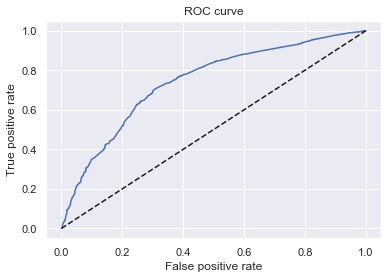

In [67]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [68]:
AUROC = roc_auc_score(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7408167918408451

#### Is this value good?

Well, and it's difficult to say because it mostly depends on our data.
Even a model that is built in an excellent way may not be very accurate just because the data provided
are not good enough.
That being said, a common skill for interpretation of area under the curve is this the model is bad 

- bad if AUC is between 50% and 60%
- poor if it is between 60% and 70%,
- fair if it is between 70% and 80% percent 
- good, if it's between 80% and 90%.
- excellent if it's between 90% and 100%

According to that criteria, we can say our model is fair.
But as we said, it is far more important to know to what extent the outcome of interest can be explained by the available information.
This is why typically few competing models are built for every analytical solution with an application in industry when possible.

These competing models are built by different competing models or teams of models.

### Gini and Kolmogorov-Smirnov

#### Criteria for model performance of classification models


The first is the Gini coefficient, while the second Kolmogorov-Smirnov, they are well-established and widely accepted in the credit risk modeling community.

### Gini

In [69]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.
df_actual_predicted_probs.head()

,y_test,y_hat_test_proba,y_hat_test
201,1,0.501001,0
6459,0,0.501001,0
9055,0,0.501998,0
12101,0,0.542538,0
9672,1,0.565603,0


In [70]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.
df_actual_predicted_probs.head()

,index,y_test,y_hat_test_proba,y_hat_test
0,201,1,0.501001,0
1,6459,0,0.501001,0
2,9055,0,0.501998,0
3,12101,0,0.542538,0
4,9672,1,0.565603,0


In [71]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['y_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['y_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [72]:
df_actual_predicted_probs.head()

,index,y_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,201,1,0.501001,0,1,1,0
1,6459,0,0.501001,0,2,1,1
2,9055,0,0.501998,0,3,1,2
3,12101,0,0.542538,0,4,1,3
4,9672,1,0.565603,0,5,2,3


In [73]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['y_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['y_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [74]:
df_actual_predicted_probs.head()

,index,y_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,201,1,0.501001,0,1,1,0,0.000074,0.00008,0.000000
1,6459,0,0.501001,0,2,1,1,0.000148,0.00008,0.001032
2,9055,0,0.501998,0,3,1,2,0.000223,0.00008,0.002064
3,12101,0,0.542538,0,4,1,3,0.000297,0.00008,0.003096
4,9672,1,0.565603,0,5,2,3,0.000371,0.00016,0.003096


Text(0.5, 1.0, 'Gini')

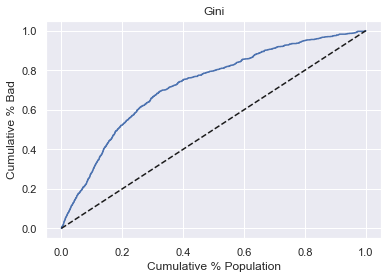

In [75]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [76]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4816335836816903

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

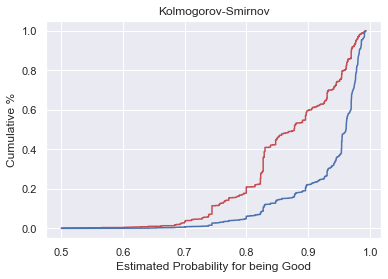

In [77]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [78]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.39900732065533207